# Activity 5.1: Clustering

#### Objective:

This activity aims to perform classification  of unlabeled data using K Means and Agglomerative Clustering

#### Intended Learning Outcomes (ILOs):
* Build the model using K Means and Agglomerative clustering.
* Determine the optimum number of clusters using elbow method.
* Visualize the dendogram produced by the agglomerative clustering


#### Resources:
* Jupyter Notebook
* Wholesale customers data.csv

#### Procedure:

We will used K-Means clustering to cluster the clients of a wholesale distributor based on their annual spending on diverse product categories, like milk, grocery, region, etc.


Import the needed libraries

In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "2"
os.environ["MKL_NUM_THREADS"] = "2"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans


Load the dataset and check the first five rows

In [3]:
df=pd.read_csv("Wholesale customers data.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


Check the descriptive statistics of the dataset

In [4]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Since K-Means is a distance-based algorithm, the difference between the magnitudes of the data will create a problem. Let us apply featuring scaling to standardize the data.

In [5]:
# Use standard scaler to standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

,0,1,2,3,4,5,6,7
count,4.400000e+02,4.400000e+02,4.400000e+02,440.000000,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,1.614870e-17,3.552714e-16,-3.431598e-17,0.000000,-4.037175e-17,3.633457e-17,2.422305e-17,-8.074349e-18
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-6.902971e-01,-1.995342e+00,-9.496831e-01,-0.778795,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-6.902971e-01,-7.023369e-01,-7.023339e-01,-0.578306,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-6.902971e-01,5.906683e-01,-2.767602e-01,-0.294258,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,1.448652e+00,5.906683e-01,3.905226e-01,0.189092,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,1.448652e+00,5.906683e-01,7.927738e+00,9.183650,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


Build the K-Means model

In [6]:

# Create cluster of 2
kmeans = KMeans(n_clusters=2, init='k-means++')

# fit the k means algorithm on scaled data
kmeans.fit(data_scaled)

,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


 Calculate the inertia to evaluate how well the formed clusters are. 

In [8]:
# inertia on the fitted data
kmeans.inertia_

2599.3873849123092

Interpret the result of the inertia

Type your answer here

Use the elbow curve to determine the optimum number of clusters in Python.



Text(0, 0.5, 'Inertia')

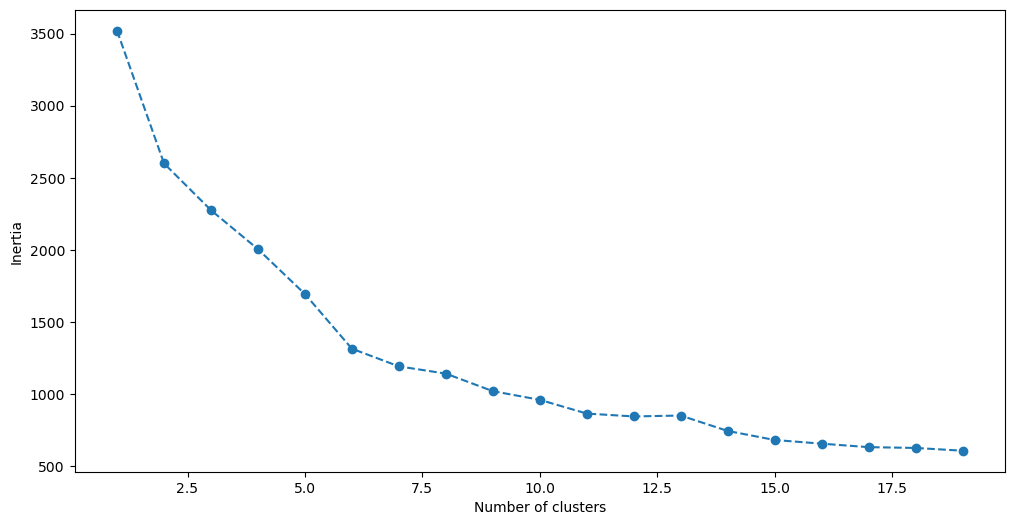

In [27]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o', linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

Interpret the result of the elbow curve. 

Type your answer here

Build a model using 5 clusters and k-means ++ initialization

In [10]:
# k means using 5 clusters and k-means++ initialization
kmeans = KMeans(n_clusters = 5, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

In [11]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

cluster
0    202
3    130
2     91
1     16
4      1
Name: count, dtype: int64

There are 208 data points belonging to cluster 1 (index 1), then 125 points in cluster 2 (index 2), and so on.

Compute the centroids of the K means cluster

In [12]:
centroids = kmeans.cluster_centers_
print(centroids)

[[-6.37352811e-01  5.90668285e-01 -1.55369842e-02 -3.72768380e-01
  -4.55911321e-01 -4.94760510e-02 -4.42375800e-01 -1.33312842e-01]
 [-6.90297086e-01  1.86604160e-01  2.79744286e+00  2.53321722e-01
  -6.50947105e-02  2.73711548e+00 -3.65528618e-01  7.31790248e-01]
 [-5.25762569e-01 -1.58328552e+00 -5.21748261e-02 -3.48899093e-01
  -3.92505728e-01  2.62109971e-02 -4.12806976e-01 -1.50559940e-01]
 [ 1.44865163e+00  1.62981949e-01 -2.98765563e-01  7.52464459e-01
   9.81280051e-01 -3.31426816e-01  1.02560512e+00  9.57158245e-02]
 [-6.90297086e-01  5.90668285e-01  1.96681731e+00  5.17550306e+00
   1.28721685e+00  6.90059988e+00 -5.54861977e-01  1.64784475e+01]]


What is the purpose of the centroids?

Type your answer here

Fit an agglomerative clustering model with two clusters.

In [13]:
from sklearn.cluster import AgglomerativeClustering

ag = AgglomerativeClustering(n_clusters=2, linkage='ward', compute_full_tree=True)
ag = ag.fit(data_scaled)
df['agglom'] = ag.fit_predict(data_scaled)

Visualize the dendrogram produced by agglomerative clustering

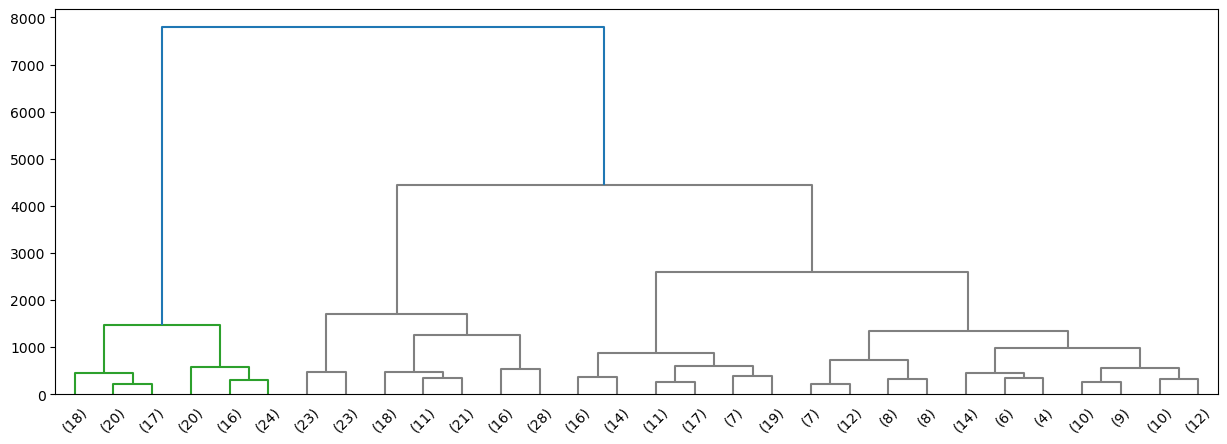

In [14]:
from scipy.cluster import hierarchy
from matplotlib import colors
import seaborn as sns

Z = hierarchy.linkage(ag.children_, method='ward')

fig, ax = plt.subplots(figsize=(15,5))

# Some color customization
dark_palette = sns.color_palette()
red = colors.to_hex(dark_palette[2])
blue = colors.to_hex(dark_palette[0])

hierarchy.set_link_color_palette([red, 'gray'])

den = hierarchy.dendrogram(Z, orientation='top', 
                           p=30, truncate_mode='lastp',
                           show_leaf_counts=True, ax=ax,
                           above_threshold_color=blue)

Interpret the result of the dendogram

Type your answer here

Supplementary Activity:


* Choose your own dataset.


*The dataset chosen was the Indonesian Commuter Dataset.* <Br>
[link to the dataset](https://www.kaggle.com/datasets/rezkyyayang/kepuasanhidupkomuter?select=data_keterangan.csv)

***data_commuter.csv** contains the data, while **data_keterangan.csv** contains what each column means, as well as the possible values.*

* Import the dataset 


In [15]:
commuter = pd.read_csv('data_commuter.csv')
columns = pd.read_csv('data_keterangan.csv')

In [16]:
commuter.head()

,No. Responden,A.1,A.2,A.3,A.4,A.5,A.6,B.1,B.2,C.1,...,E.3,F.1,F.2,F.3,F.4,F.5,F.6,F.7,F.8,Kepuasan Hidup
0,1,1,30,1,3,1,1,4,4,1,...,5,4,3,4,4,4,3,3,3,Sangat Tidak Puas
1,2,1,40,1,3,1,5,4,5,2,...,4,4,3,4,4,5,4,4,5,Sangat Tidak Puas
2,3,1,38,1,3,1,5,4,4,1,...,5,5,4,4,3,3,3,3,4,Sangat Tidak Puas
3,4,1,27,2,3,1,5,5,4,2,...,4,4,5,5,4,3,4,5,4,Sangat Tidak Puas
4,5,2,28,2,3,1,5,5,5,3,...,4,4,4,5,3,4,5,5,4,Sangat Tidak Puas


In [17]:
columns.head(20)

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,A,RESPONDENT IDENTITY,ANSWER
2,A.1,Gender,1. Male
3,NaN,NaN,2. Female
4,A.2,Age,Ratio
5,A.3,Marital Status,1. Married
6,NaN,NaN,2. Single
7,NaN,NaN,3. Widower
8,NaN,NaN,4. Widow
9,A.4,Educational Background,1. Primary School


* Determine the number of datapoints, columns and data types


In [20]:
print("Datapoints (rows):", commuter.shape[0])
print("Columns:", commuter.shape[1])

Datapoints (rows): 384
Columns: 30


* Remove unneccesary columns


*Based on the content of **data_keterangan.csv**, only the first and last columns are unnecessary to perform the suceeding tasks relevant to clustering.*

In [21]:
print(list(commuter.columns))

['No. Responden', 'A.1', 'A.2', 'A.3', 'A.4', 'A.5', 'A.6', 'B.1', 'B.2', 'C.1', 'C.2', 'C.3', 'C.4', 'D.1', 'D.2', 'D.3', 'D.4', 'D.5', 'E.1', 'E.2', 'E.3', 'F.1', 'F.2', 'F.3', 'F.4', 'F.5', 'F.6', 'F.7', 'F.8', 'Kepuasan Hidup']


In [22]:
commuter_new = commuter.drop(columns=['No. Responden','Kepuasan Hidup'])
commuter_new.head()

,A.1,A.2,A.3,A.4,A.5,A.6,B.1,B.2,C.1,C.2,...,E.2,E.3,F.1,F.2,F.3,F.4,F.5,F.6,F.7,F.8
0,1,30,1,3,1,1,4,4,1,1,...,4,5,4,3,4,4,4,3,3,3
1,1,40,1,3,1,5,4,5,2,2,...,5,4,4,3,4,4,5,4,4,5
2,1,38,1,3,1,5,4,4,1,2,...,4,5,5,4,4,3,3,3,3,4
3,1,27,2,3,1,5,5,4,2,2,...,5,4,4,5,5,4,3,4,5,4
4,2,28,2,3,1,5,5,5,3,2,...,5,4,4,4,5,3,4,5,5,4


* Do data cleaning such as removing empty values(NaN), replacing missing data .


*No missing values*

In [23]:
commuter_new.isna().sum()

A.1    0
A.2    0
A.3    0
A.4    0
A.5    0
A.6    0
B.1    0
B.2    0
C.1    0
C.2    0
C.3    0
C.4    0
D.1    0
D.2    0
D.3    0
D.4    0
D.5    0
E.1    0
E.2    0
E.3    0
F.1    0
F.2    0
F.3    0
F.4    0
F.5    0
F.6    0
F.7    0
F.8    0
dtype: int64

* Standardize the variables.


In [24]:
# Use standard scaler to standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
commuter_scaled = scaler.fit_transform(commuter_new)

* Perform descriptive statistics such as mean, median and mode


In [25]:
# statistics of original data
commuter_new.describe()

,A.1,A.2,A.3,A.4,A.5,A.6,B.1,B.2,C.1,C.2,...,E.2,E.3,F.1,F.2,F.3,F.4,F.5,F.6,F.7,F.8
count,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,...,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000,384.000000
mean,1.257812,35.166667,1.315104,3.270833,1.083333,3.520833,3.929688,4.031250,1.721354,1.986979,...,3.815104,3.796875,3.505208,3.229167,3.203125,3.223958,3.190104,3.273438,3.330729,3.369792
std,0.438001,9.120506,0.648099,1.019181,0.466455,1.395473,0.676154,0.649613,0.702820,1.145926,...,0.642028,0.719291,0.771539,0.797898,0.905677,0.871270,0.886691,0.782126,0.841169,0.823115
min,1.000000,18.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,28.000000,1.000000,3.000000,1.000000,3.000000,4.000000,4.000000,1.000000,1.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,1.000000,35.000000,1.000000,3.000000,1.000000,4.000000,4.000000,4.000000,2.000000,2.000000,...,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,2.000000,40.000000,1.000000,4.000000,1.000000,5.000000,4.000000,4.000000,2.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,2.000000,56.000000,5.000000,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [26]:
# statistics of scaled data
pd.DataFrame(commuter_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
count,3.840000e+02,3.840000e+02,3.840000e+02,3.840000e+02,3.840000e+02,3.840000e+02,3.840000e+02,3.840000e+02,3.840000e+02,3.840000e+02,...,3.840000e+02,3.840000e+02,3.840000e+02,3.840000e+02,3.840000e+02,3.840000e+02,3.840000e+02,3.840000e+02,3.840000e+02,3.840000e+02
mean,-9.251859e-18,2.775558e-16,-1.295260e-16,-1.572816e-16,1.804112e-16,-7.401487e-17,5.551115e-17,-1.387779e-17,-7.170190e-17,-6.476301e-17,...,1.711594e-16,-9.251859e-18,-1.665335e-16,1.942890e-16,9.251859e-18,-2.405483e-16,1.850372e-16,-8.326673e-17,1.480297e-16,1.850372e-16
std,1.001305e+00,1.001305e+00,1.001305e+00,1.001305e+00,1.001305e+00,1.001305e+00,1.001305e+00,1.001305e+00,1.001305e+00,1.001305e+00,...,1.001305e+00,1.001305e+00,1.001305e+00,1.001305e+00,1.001305e+00,1.001305e+00,1.001305e+00,1.001305e+00,1.001305e+00,1.001305e+00
min,-5.893797e-01,-1.884661e+00,-4.868319e-01,-2.231004e+00,-1.788854e-01,-1.808793e+00,-2.857640e+00,-3.130940e+00,-1.027711e+00,-1.736213e+00,...,-4.390429e+00,-3.893452e+00,-3.251262e+00,-2.797445e+00,-2.435745e+00,-2.555878e+00,-2.473198e+00,-2.910534e+00,-2.774437e+00,-2.882809e+00
25%,-5.893797e-01,-7.868002e-01,-4.868319e-01,-2.660830e-01,-1.788854e-01,-3.737175e-01,1.041246e-01,-4.816831e-02,-1.027711e+00,-8.624178e-01,...,-1.271234e+00,-1.109307e+00,-6.556599e-01,-2.875878e-01,-2.245723e-01,-2.573835e-01,-2.146771e-01,-3.500642e-01,-3.936911e-01,-4.498449e-01
50%,-5.893797e-01,-1.829768e-02,-4.868319e-01,-2.660830e-01,-1.788854e-01,3.438201e-01,1.041246e-01,-4.816831e-02,3.969858e-01,1.137754e-02,...,2.883631e-01,2.827646e-01,6.421411e-01,-2.875878e-01,-2.245723e-01,-2.573835e-01,-2.146771e-01,-3.500642e-01,-3.936911e-01,-4.498449e-01
75%,1.696699e+00,5.306327e-01,-4.868319e-01,7.163773e-01,-1.788854e-01,1.061358e+00,1.041246e-01,-4.816831e-02,3.969858e-01,8.851729e-01,...,2.883631e-01,2.827646e-01,6.421411e-01,9.673409e-01,8.810143e-01,8.918639e-01,9.145833e-01,9.301705e-01,7.966819e-01,7.666370e-01
max,1.696699e+00,2.287210e+00,5.693116e+00,2.681298e+00,8.407616e+00,1.061358e+00,1.585007e+00,1.493217e+00,4.671076e+00,2.632764e+00,...,1.847961e+00,1.674837e+00,1.939942e+00,2.222270e+00,1.986601e+00,2.041111e+00,2.043844e+00,2.210405e+00,1.987055e+00,1.983119e+00


* Perform data visualization 
* Use k-means clustering to identify the groups of the dataset.
* Use 1 to 10 clusters
* Determine the optimum number of clusters


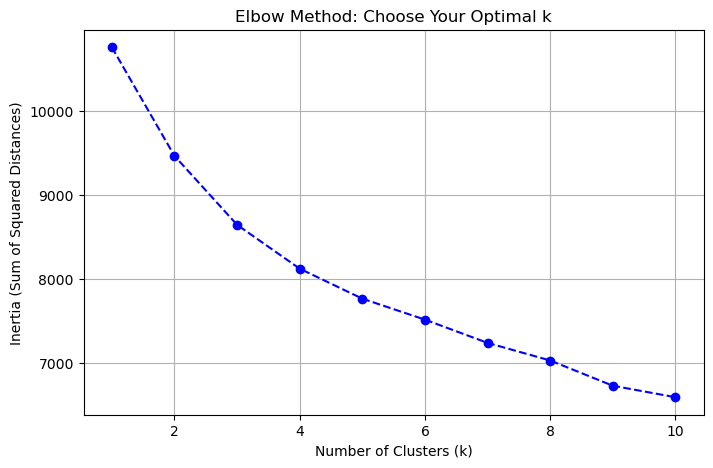


🔹 Number of values per cluster:
k=2: [259 125]


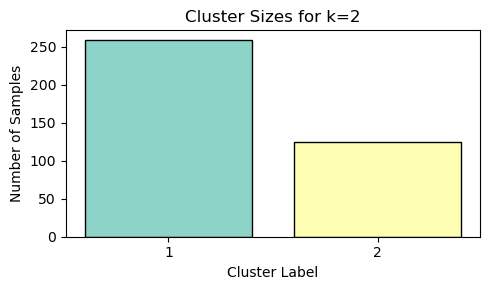

k=3: [133 133 118]


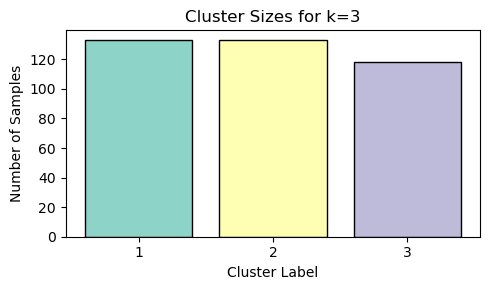

k=4: [ 93  74 117 100]


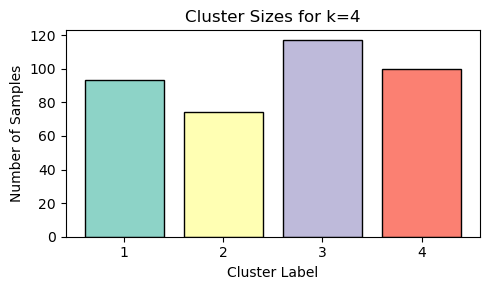

k=5: [ 89 100  50  79  66]


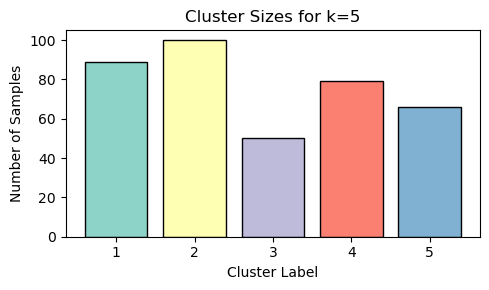

k=6: [77 81 30 48 75 73]


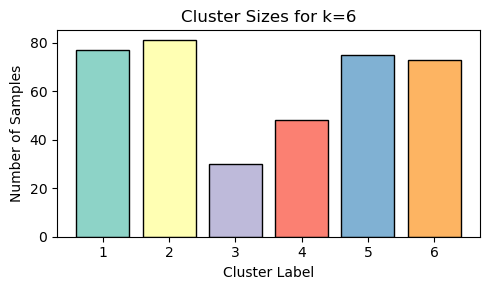

k=7: [50 76  7 55 47 72 77]


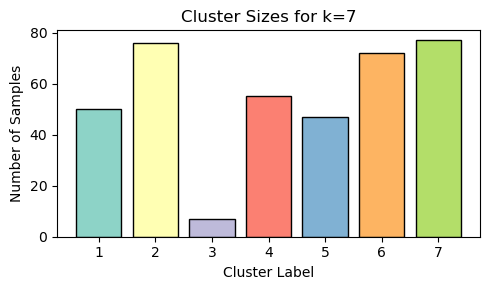

k=8: [10 55 84 41 54 13 74 53]


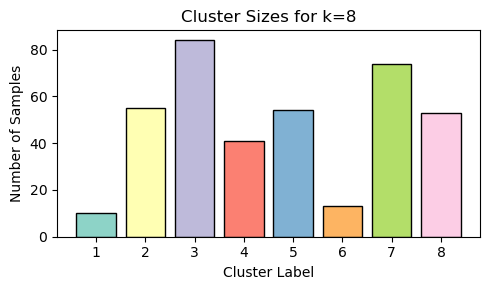

k=9: [38 49 56 55 66  7 55 52  6]


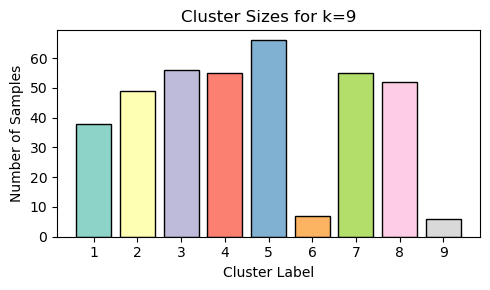

k=10: [58 55 54 37  4 53 34 32 53  4]


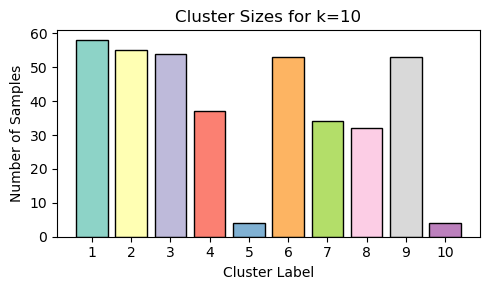


👉 Enter your chosen number of clusters (2–10):  3


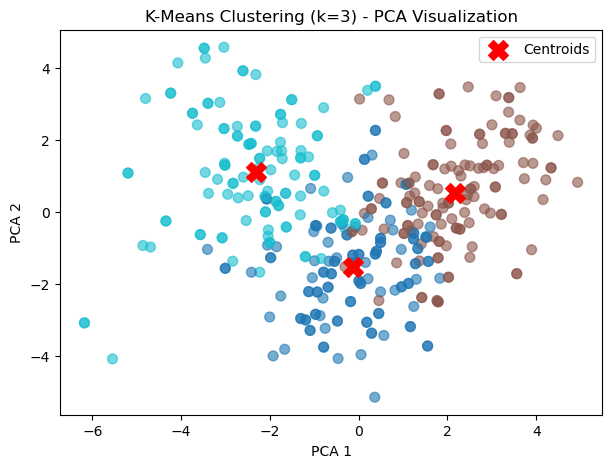


📊 PCA Loadings — Feature Contributions per Principal Component:


,PCA1,PCA2
A.1,0.105341,0.020050
A.2,-0.245162,0.180726
A.3,0.144597,-0.181138
A.4,-0.049249,0.211925
A.5,0.002819,-0.037179
A.6,0.150449,-0.216679
B.1,-0.024051,0.272552
B.2,0.017837,0.280305
C.1,-0.032038,0.048259
C.2,-0.172716,0.186191


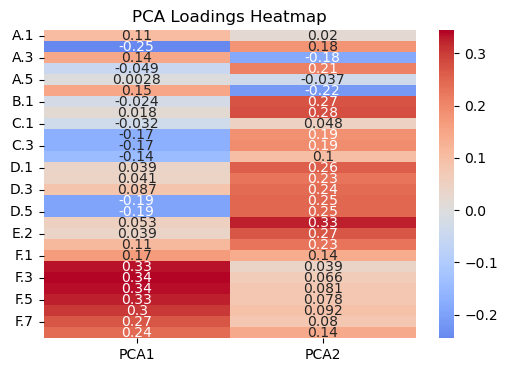

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

#Standardize data
scaler = StandardScaler()
commuter_scaled = scaler.fit_transform(commuter_new)
#run K-Means for k=1 to 10

inertias = []
cluster_sizes = {}

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(commuter_scaled)
    inertias.append(kmeans.inertia_)
    if k > 1:
        counts = np.bincount(kmeans.labels_)
        cluster_sizes[k] = counts


#Elbow Method Plot

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertias, marker='o', linestyle='--', color='blue')
plt.title('Elbow Method: Choose Your Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.grid(True)
plt.show()


#Display + visualize cluster sizes

print("\n🔹 Number of values per cluster:")
for k, sizes in cluster_sizes.items():
    print(f"k={k}: {sizes}")
    plt.figure(figsize=(5, 3))
    colors = sns.color_palette('Set3', len(sizes))
    plt.bar(range(1, len(sizes)+1), sizes, color=colors, edgecolor='black')
    plt.title(f"Cluster Sizes for k={k}")
    plt.xlabel("Cluster Label")
    plt.ylabel("Number of Samples")
    plt.xticks(range(1, len(sizes)+1))
    plt.tight_layout()
    plt.show()


#Let user choose k

while True:
    try:
        chosen_k = int(input("\n👉 Enter your chosen number of clusters (2–10): "))
        if 2 <= chosen_k <= 10:
            break
        else:
            print("⚠️ Please enter a value between 2 and 10.")
    except ValueError:
        print("⚠️ Invalid input. Please enter an integer.")


#Fit final model

kmeans_final = KMeans(n_clusters=chosen_k, random_state=42, n_init=10)
labels = kmeans_final.fit_predict(commuter_scaled)
centroids = kmeans_final.cluster_centers_


#Visualization (auto-handles >2D using PCA)

if commuter_scaled.shape[1] > 2:
    pca = PCA(n_components=2)
    reduced = pca.fit_transform(commuter_scaled)
    centroids_2d = pca.transform(centroids)
    plt.figure(figsize=(7, 5))
    plt.scatter(reduced[:, 0], reduced[:, 1], c=labels, cmap='tab10', s=50, alpha=0.6)
    plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1],
                c='red', marker='X', s=200, label='Centroids')
    plt.title(f'K-Means Clustering (k={chosen_k}) - PCA Visualization')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.legend()
    plt.show()

    #PCA Loadings

    loadings = pd.DataFrame(
        pca.components_.T,
        columns=['PCA1', 'PCA2'],
        index=commuter_new.select_dtypes(include=[np.number]).columns
    )

    print("\n📊 PCA Loadings — Feature Contributions per Principal Component:")
    display(loadings)

    # Optional: visualize PCA loadings
    plt.figure(figsize=(6, 4))
    sns.heatmap(loadings, annot=True, cmap='coolwarm', center=0)
    plt.title('PCA Loadings Heatmap')
    plt.show()

else:
    plt.figure(figsize=(7, 5))
    plt.scatter(commuter_scaled[:, 0], commuter_scaled[:, 1],
                c=labels, cmap='tab10', s=50, alpha=0.6)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                c='red', marker='X', s=200, label='Centroids')
    plt.title(f'K-Means Clustering (k={chosen_k})')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()


* Use agglomerative clustering and visualize the dendogram


* Compare the results obtained by the K means and agglomerative clustering.

In [14]:
## type your code here

#### Conclusion

Type your answer here